# Assignment 2

## Applying a neural network to a business problem
### Part 1:  Classification problem

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will be graded.

In [78]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Import data
df = pd.read_csv('Mamo_data.csv', delimiter = ",")

In [80]:
# Explore the size of the data set
dataset_size = df.shape
print(f"The dataset contains {dataset_size[0]} rows and {dataset_size[1]} columns.")

The dataset contains 830 rows and 11 columns.


In [81]:
df.head()


,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
0,0,0,45,1,0,0,0,0,1,0,3
1,1,0,69,0,0,1,0,0,0,1,3
2,0,0,58,0,0,1,0,0,1,0,3
3,1,0,72,0,0,1,0,1,0,0,3
4,1,0,71,0,0,1,0,0,1,0,3


In [82]:
# Explore type of data and feature names
data_types = df.dtypes

# Get feature names (column names)
feature_names = df.columns

# Print the data types and feature names
print("Data Types of Each Feature:")
print(data_types)

print("\nFeature Names:")
print(list(feature_names))

Data Types of Each Feature:
malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object

Feature Names:
['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4', 'margin2', 'margin3', 'margin4', 'margin5', 'density']


Choose `malignanttrue` as the `y` variable, and the rest of the variables except the unnamed column as `X` variables.
**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [83]:
# Split data into features (X) and response (y)
y = df['malignanttrue']
X = df.drop('malignanttrue', axis=1)

# Display the shape of X and y to confirm the split
print(f"Features (X) shape: {X.shape}")
print(f"Response (y) shape: {y.shape}")

Features (X) shape: (830, 10)
Response (y) shape: (830,)


In [84]:
# Explore type of data and feature names

df.sample(10, random_state=0)

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
647,1,5,66,0,0,1,0,0,1,0,3
31,0,3,49,0,0,1,0,0,1,0,3
474,0,4,48,0,0,1,0,0,0,1,3
8,0,2,23,0,0,0,0,0,0,0,3
382,1,4,46,0,1,0,0,0,0,0,3
255,1,4,50,1,0,0,0,0,0,0,3
672,1,5,74,0,0,1,0,1,0,0,3
679,1,5,74,0,0,1,0,0,1,0,3
196,0,4,70,0,0,0,0,0,0,0,1
652,1,5,54,0,0,1,0,0,1,0,3


In [85]:
# Get feature names (column names)
feature_names = df.columns

# Display the data types and feature names
print("Data Types of Each Feature:")
print(data_types)

print("\nFeature Names:")
print(list(feature_names))

# Display a random sample of 5 records
random_sample = df.sample(5)

print("\nRandom Sample of Records:")
print(random_sample)

Data Types of Each Feature:
malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object

Feature Names:
['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4', 'margin2', 'margin3', 'margin4', 'margin5', 'density']

Random Sample of Records:
     malignanttrue  score  age  shape2  shape3  shape4  margin2  margin3  \
90               0      4   45       0       0       0        0        0   
658              1      5   67       0       0       1        0        0   
435              1      4   39       0       0       1        0        0   
71               0      4   43       0       0       0        0        0   
473              1      4   64       0       0       1        0        0   

     margin4  margin5  density  
90         0        0        3  
658        0        

In [86]:
# Change the array shape of the output from a dataframe single column vector
y = df['malignanttrue']
# to a contiguous flattened array
y_flattened = y.values.ravel()

print("Contiguous Flattened Array:")
print(y_flattened)


Contiguous Flattened Array:
[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1

In [87]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (622, 10)
X_test shape: (208, 10)
y_train shape: (622,)
y_test shape: (208,)


Scale the data in the next cell.  
Use the variable names `X_train` and `X_test`.

In [88]:
# Scale the data
scaler = StandardScaler()  

#fit using only the training data
X_train = scaler.fit_transform(X_train)


#transformation to test data
X_test = scaler.transform(X_test)

print("Training and test data have been scaled.")


Training and test data have been scaled.


Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [89]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.8461538461538461

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [90]:
# Fit and check accuracy for various numbers of nodes on both layers
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.82476
(3, 4) : 0.83762
(3, 5) : 0.82637
(4, 3) : 0.81511
(4, 4) : 0.82476
(4, 5) : 0.81350
(5, 3) : 0.81672
(5, 4) : 0.81994
(5, 5) : 0.82637


In [91]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.8376
This corresponds to nodes (3, 4)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [92]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=optimal_hidden_layer_size, random_state=1)
# Fit data with best parameter
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(3, 4), max_iter=1000, random_state=1)

In [93]:
# Predict
y_pred = clf.predict(X_test)
# Accuracy 
accuracy_score(y_pred,y_test)

0.8269230769230769

For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable. 

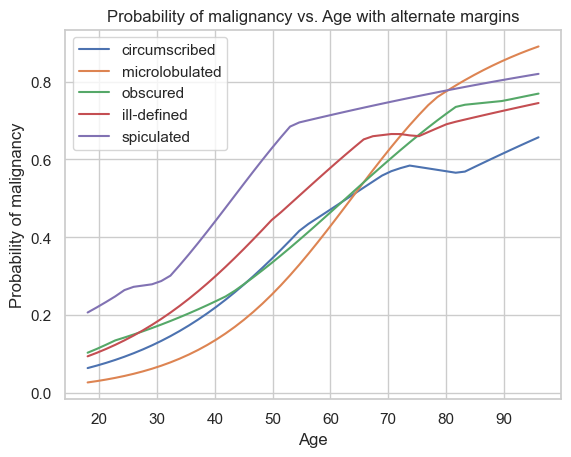

In [94]:
# Visualise probability of malignancy vs age with alternate margins
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = clf.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

### Now answerr the following questions about this notebook for Part 1.

#### Question 1
The biomedical industry uses machinery to capture images and other data, and also software that provides the specialist with information to make decisions. These software applications often use vast data sets such as the mammogram data set you used in the notebook. 

- Consider the medical data and the context in which it is used. Why is machine learning, and specifically neural networks, an appropriate method for prediction in these circumstances? `(Max. 200 words)`

 ```ANSWER:```
     `Machine learning, especially neural networks, is an excellent tool for making predictions in the medical field due to its ability to process and analyze large, complex datasets like mammogram images. Medical data often contains patterns that are difficult for humans to identify, but neural networks can learn and detect these patterns through their multi-layered architecture, mimicking the human brain's function​(Kufel et al.,2023).

Neural networks excel in handling unstructured data, such as medical images, making them highly useful for tasks like diagnosing diseases or predicting health outcomes. With large datasets, neural networks improve their accuracy by continuously learning from new data. This makes them valuable in the evolving healthcare field, where models must adapt as new medical information becomes available. Such adaptability leads to improved decision-making in diagnoses and treatments​(Kufel et al.,2023).

Furthermore, as the field of AI in medicine grows, neural networks demonstrate the ability to enhance patient care by improving disease diagnosis speed and treatment efficacy​(diagnostics-13-02582). This shows the importance of integrating machine learning, particularly neural networks, into modern medical practices to increase efficiency and accuracy in patient outcomes.(Kufel et al.,2023)

#### Question 2

- What is the purpose of a response curve in the context of neural networks? What insights can be gained from the response curves you generated in this IDE notebook? `(Max. 200 words)`

     ```ANSWER:```A response curve, also called a learning curve, is a graph that shows how well a neural network is performing over time during training. It helps us assess whether the model is learning properly or facing issues.

By examining the response curve, we can observe how the model’s accuracy improves as training progresses. If the model performs well on training data but poorly on new (validation) data, it may indicate overfitting, meaning the model has memorized the training data but failed to learn general patterns​(Kufel et al.,2023). On the other hand, if the model performs poorly on both training and validation data, it is underfitting, meaning the model is too simple and unable to capture key patterns in the data​(Kufel et al.,2023).

Response curves can also guide the adjustment of neural network parameters, such as the number of layers or nodes. By analyzing these curves, we can optimize the model’s architecture and performance, which is crucial in real-world applications like medical predictions. Properly tuning the model ensures more accurate and reliable outcomes, particularly in healthcare settings where predictive models assist in diagnosis and treatment decisions​(Kufel et al.,2023).

### Part 2: Use Python to perform K-means clustering to inform a business case

In [95]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [96]:
# Import data
df = pd.read_csv("online_shoppers_intention.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [97]:
# Explore type of data and feature names
df.sample(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6441,0.0,0.000000,0.0,0.000000,6.0,339.500000,0.000000,0.016667,124.904586,0.0,Nov,2,6,9,20,New_Visitor,False,True
8475,0.0,0.000000,0.0,0.000000,4.0,51.500000,0.000000,0.050000,0.000000,0.0,Dec,2,2,1,2,New_Visitor,False,False
1771,0.0,0.000000,1.0,44.000000,41.0,1089.750000,0.000000,0.005854,0.000000,0.0,Mar,2,2,3,2,New_Visitor,False,False
3625,0.0,0.000000,0.0,0.000000,22.0,647.666667,0.009091,0.026061,0.000000,1.0,May,2,2,4,3,Returning_Visitor,True,False
10294,11.0,202.425439,5.0,1767.666667,338.0,13265.355950,0.007520,0.018856,1.114150,0.0,Nov,2,2,3,2,Returning_Visitor,False,True
4321,7.0,214.333333,5.0,53.000000,29.0,528.196429,0.000000,0.013154,0.000000,0.2,May,1,1,1,2,Returning_Visitor,False,False
7896,0.0,0.000000,0.0,0.000000,96.0,1231.790460,0.002128,0.010269,0.000000,0.0,Jul,2,4,3,1,Returning_Visitor,False,False
2564,12.0,203.471429,1.0,0.000000,220.0,11308.097950,0.001700,0.012415,0.673128,0.8,May,2,2,5,6,Returning_Visitor,False,False


Number of clusters: 2, Silhouette Score: 0.7807
Number of clusters: 3, Silhouette Score: 0.6948
Number of clusters: 4, Silhouette Score: 0.6469
Number of clusters: 5, Silhouette Score: 0.6293
Number of clusters: 6, Silhouette Score: 0.6054
Number of clusters: 7, Silhouette Score: 0.5814
Number of clusters: 8, Silhouette Score: 0.5579
Number of clusters: 9, Silhouette Score: 0.5316
Number of clusters: 10, Silhouette Score: 0.5315


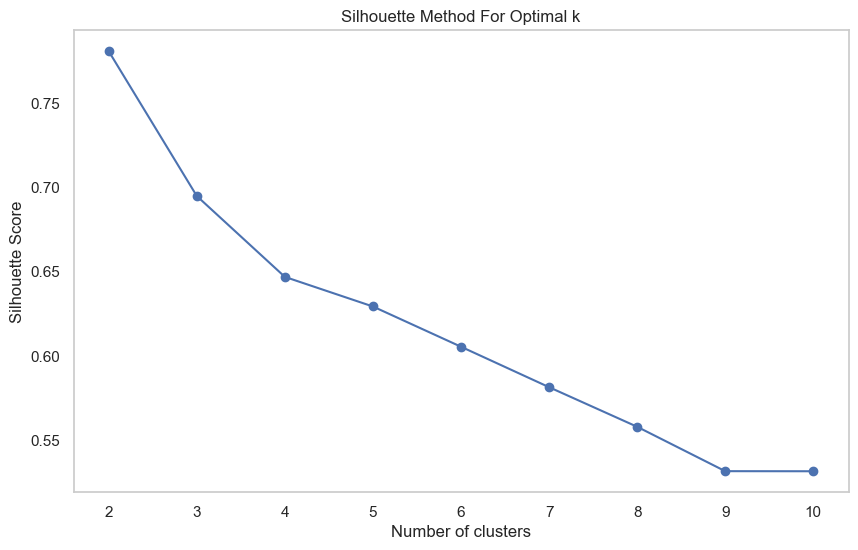

In [111]:
 df = pd.get_dummies(df, drop_first=True)
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# 2. Silhouette method
sil = []
kmax = 10

# Calculate silhouette scores for a range of cluster numbers
for k in range(2, kmax + 1):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df)  
    cluster_labels = kmeans.labels_  
    sil_score = silhouette_score(df, cluster_labels)  
    sil.append(sil_score)  
    print(f'Number of clusters: {k}, Silhouette Score: {sil_score:.4f}')  

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax + 1), sil, marker='o')
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, kmax + 1))
plt.grid()
plt.show()

Use the output from the elbow or silhouette method to decide how many clusters to use.

In [50]:
# Specify the number of clusters (you can choose the optimal number based on previous methods)
optimal_k = 4  

# Cluster the data using KMeans
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=1)  
km.fit(df)  

# Get the cluster labels
cluster_labels = km.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Print the first few rows of the DataFrame with cluster labels
print(df.head())


   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00       0.10         0.0         0.0 

In [51]:
# Check how many observations are in each cluster
cluster_counts = df['Cluster'].value_counts()

# Print the counts for each cluster
print("Number of observations in each cluster:")
print(cluster_counts)


Number of observations in each cluster:
Cluster
1    9060
0    2617
3     571
2      68
Name: count, dtype: int64


In [52]:
# Set up a dataframe with cluster allocations
clustered_df = df.copy() 

# Display the first few rows of the new DataFrame
print("DataFrame with cluster allocations:")
print(clustered_df.head())


DataFrame with cluster allocations:
   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00

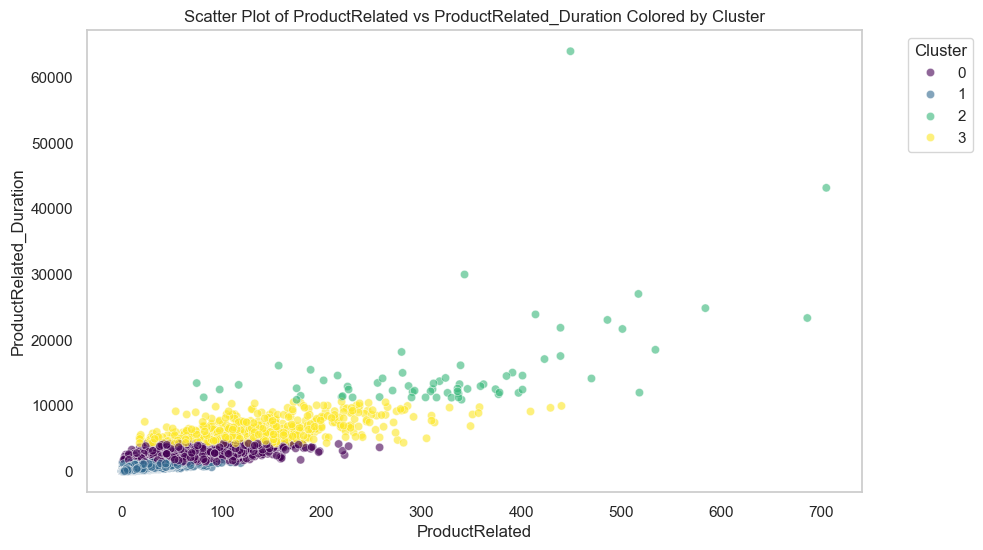

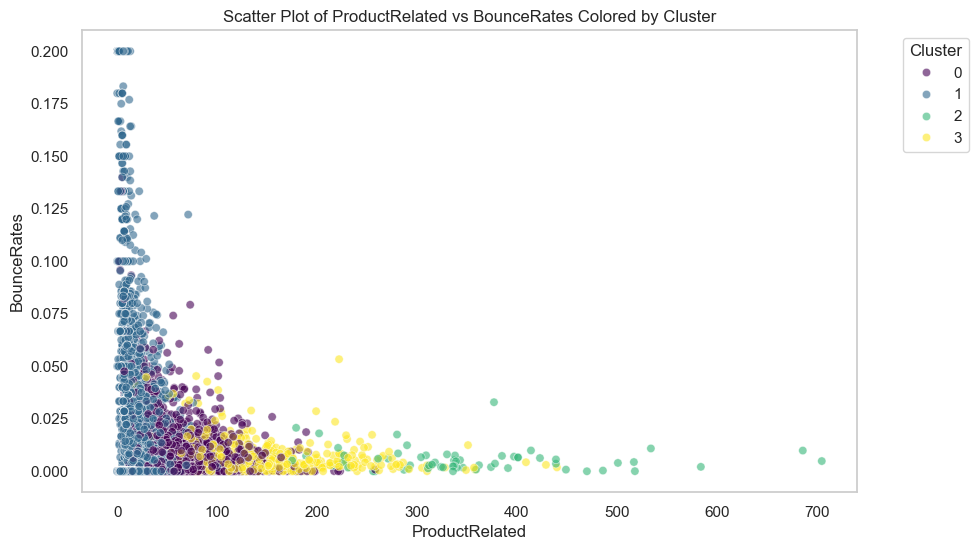

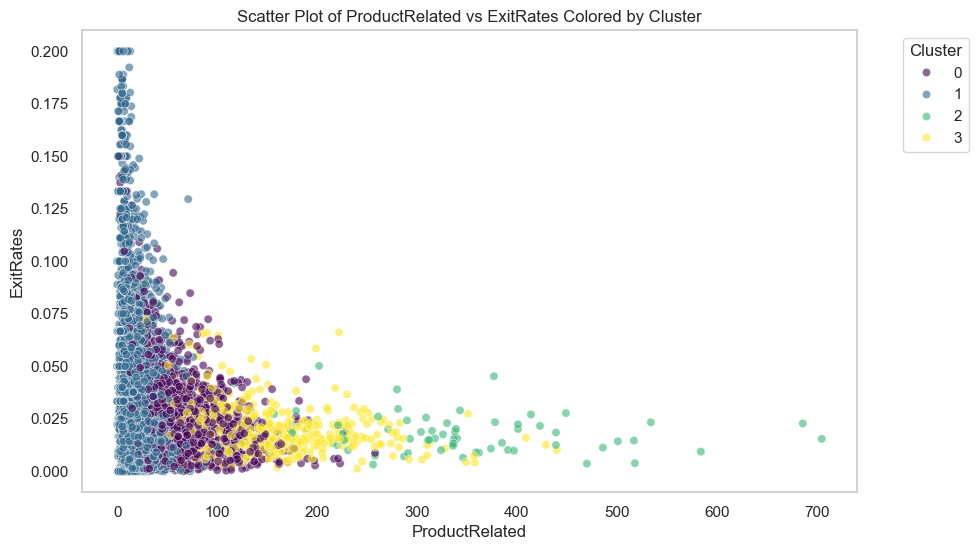

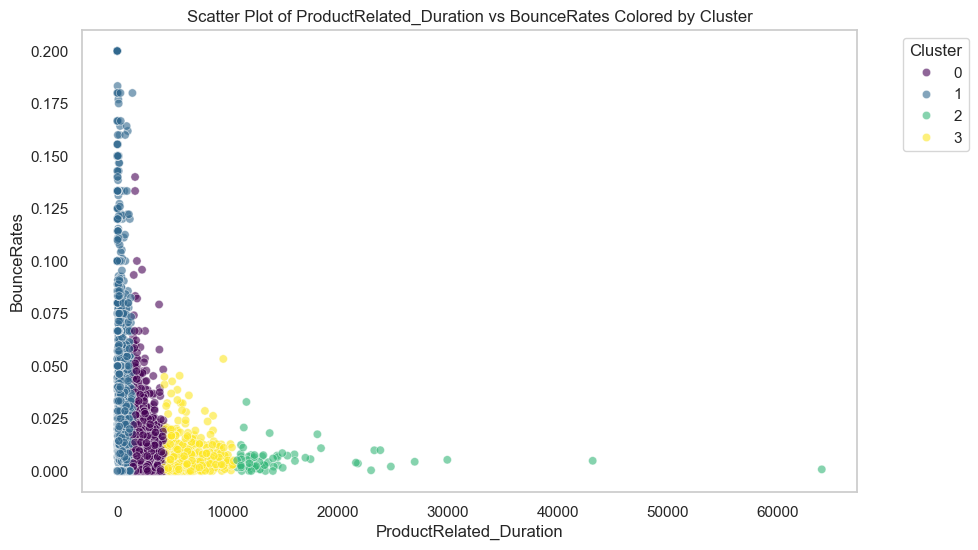

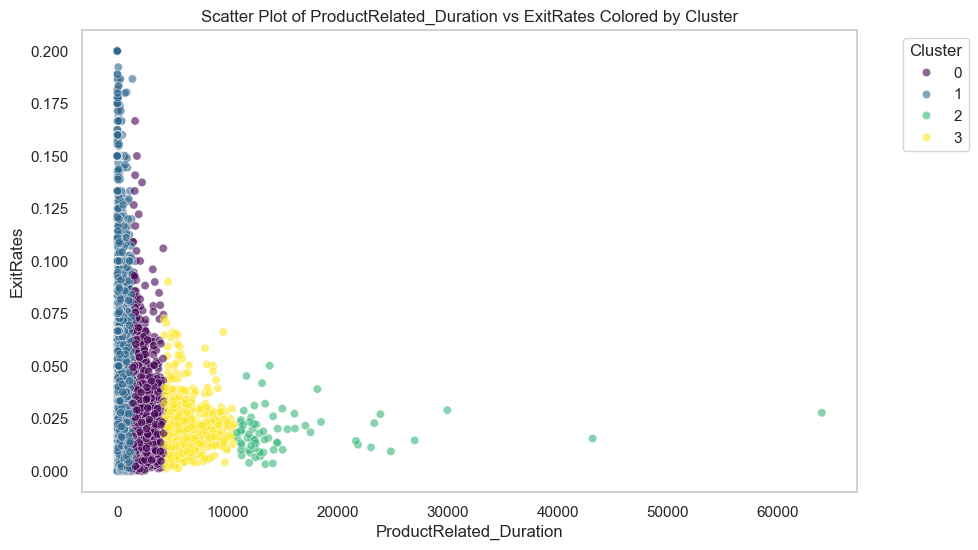

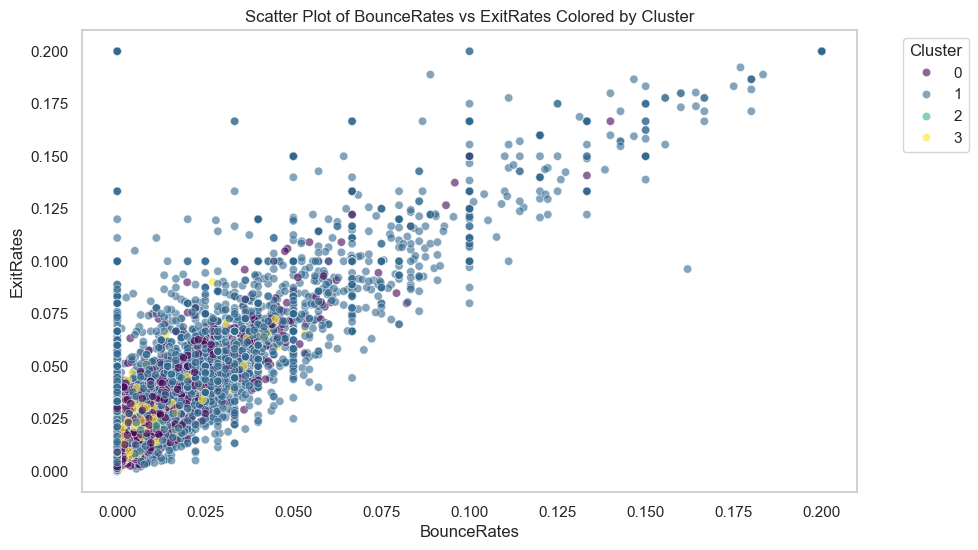

In [53]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates']

# Plot using seaborn
sns.set(style="whitegrid")

# Create scatter plots for pairs of specified variables
for i in range(len(var)):
    for j in range(i + 1, len(var)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=clustered_df, x=var[i], y=var[j], hue='Cluster', palette='viridis', alpha=0.6, edgecolor='w')
        plt.title(f'Scatter Plot of {var[i]} vs {var[j]} Colored by Cluster')
        plt.xlabel(var[i])
        plt.ylabel(var[j])
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid()
        plt.show()


### Now answer the following questions about this notebook for Part 2.

### Question 1	


Cluster Distribution: Analyzing the scatterplots, we might observe that certain clusters display a wider spread of ProductRelated_Duration. This spread could indicate a diverse range of customer behaviors within those clusters, where some customers are very engaged while others are not. For instance, a cluster with a wide spread might contain both potential high-value customers who are deliberating their choices and those who are merely browsing without intent to purchase.

Outline- What insights can you gain from the scatterplots regarding the difference in behaviour of the different clusters? 
(Max. 300 words)

```ANSWER:```
  The scatterplots showing ProductRelated_Duration offer valuable insights into how different customer groups (or "clusters") behave. Each cluster demonstrates varying levels of engagement with products, which helps businesses understand their customers' interest levels and decision-making processes​(Kufel et al.,2023).

High Engagement vs. Low Engagement: Some clusters show a high concentration of points in the upper range of ProductRelated_Duration, indicating that these customers spend a significant amount of time interacting with product-related content. This suggests a strong interest, where customers are likely considering a purchase carefully. On the other hand, clusters with points mostly in the lower range indicate lower engagement, where customers may be less interested or making quicker decisions​(Kufel et al.,2023).

Behavioral Patterns Across Clusters: By comparing clusters, we can identify different customer segments. For instance, clusters with a higher duration of product interaction may represent high-value customers who require more detailed content or support to finalize their purchase decisions. Conversely, clusters with lower durations might correspond to customers who make quick decisions and may not need as much personalized content​(Kufel et al.,2023).

In summary, understanding these behavioral patterns through scatterplots helps businesses tailor their marketing strategies. Focusing on clusters that require more attention or personalized engagement can lead to improved customer satisfaction and increased conversion rates​​(Kufel et al.,2023).

- Discuss the quality of the clustering solution by referring to the number of observations in each cluster and the distribution of the data along each dimension. How does this affect the way you can interpret the scatterplots? (Max. 200 words)
       
       ```ANSWER:```
To evaluate the quality of a clustering solution, we need to consider two key factors: the number of points in each cluster and how the data is distributed across different dimensions, such as ProductRelated_Duration.

If the clusters have a balanced number of points, it indicates that the algorithm has effectively divided the data into meaningful groups. However, if one cluster contains most of the points, this could signal poor clustering, where the algorithm may have failed to properly separate the data. Such imbalances make it difficult to identify clear patterns within the data​(Kufel et al.,2023).

In scatterplots, well-defined clusters that show clear differences in features, like the time customers spend on product-related content, are easier to interpret. These separations allow us to understand the distinct behaviors within each cluster. On the other hand, if clusters overlap or exhibit similar data distributions, distinguishing between customer behaviors becomes challenging, limiting the insights we can derive from the data.​(Kufel et al.,2023).

Good clustering improves the clarity of scatterplots, helping to reveal meaningful patterns, whereas poor clustering creates ambiguity, making it harder to draw actionable conclusions​(Kufel et al.,2023).

Q2: How does the dimensionality of the data affect clustering results?

```ANSWER:```
High-dimensional data, where there are many features, can make clustering results difficult to interpret and visualize because there is too much information to analyze simultaneously. This is often referred to as the "curse of dimensionality," where too many dimensions complicate the clustering process​.(Kufel et al.,2023)

To address this, we can use a technique like Principal Component Analysis (PCA). PCA reduces the complexity of the data by identifying the most important features, allowing us to focus on fewer dimensions. By simplifying the data, PCA makes it easier to visualize the clustering results and observe patterns between clusters in scatterplots​.(Kufel et al.,2023)

This reduction in dimensionality improves the clarity of clustering insights, helping to better understand the differences between groups while maintaining the most relevant information from the original dataset.

Q3: Can removing outliers improve K-means clustering?

```ANSWER:```
Yes, removing outliers can significantly improve K-means clustering. K-means is sensitive to extreme values, and outliers can distort the clustering process by shifting the cluster centers (centroids) inappropriately. This skews the results and reduces the accuracy of the clusters, making them less meaningful. ​(Kufel et al.,2023)

By removing outliers or applying normalization techniques to the data, the centroids remain better positioned, leading to more accurate and interpretable clustering. This ensures that the clusters reflect the true underlying patterns in the data, resulting in a more reliable and meaningful outcome​. ​(Kufel et al.,2023)

### Question 2

Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:
- Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).
- There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis? (Max. 300 words)

       ```ANSWER:```
The K-means algorithm was an appropriate choice for identifying clusters in this dataset because of the number of observations and the presence of outliers.

First, the dataset contains 12,000 observations, which is a moderate size. K-means is efficient with this number of observations, allowing the algorithm to cluster the data without significant performance issues. However, if the dataset were much larger, such as 900,000 observations, K-means could struggle with processing time and scalability. Larger datasets may require more advanced algorithms that can better handle the additional complexity and variability.​(Kufel et al.,2023)

Second, K-means is sensitive to outliers, which are extreme values that deviate significantly from the rest of the data. These outliers can influence the positioning of the cluster centers (centroids), pulling them toward the outlier values. This distortion leads to less accurate clustering and can result in misleading interpretations of the data​(diagnostics-13-02582). Removing outliers or applying normalization techniques can significantly improve the performance of K-means by ensuring the centroids represent the true data distribution​.​(Kufel et al.,2023)

K-means was suitable for this dataset, but preprocessing steps such as outlier removal would further enhance the accuracy and reliability of the clustering results

In [56]:
!jupyter nbconvert --to pdf DSA_Assignment_Notebook.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'DSA_Assignment_Notebook.ipynb' matched no files


### THE END!